# Table of Contents
* [Make anonymous asset sale chart](#Make-anonymous-asset-sale-chart)
* [Make anonymous](#Make-anonymous)


[-0.5 -0.2 -0.1]


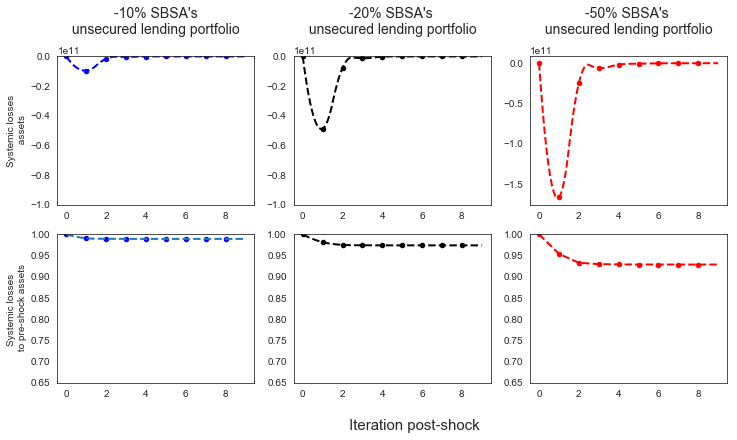

In [98]:
#run the whole thing
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline

import os
import pandas as pd
p=os.getcwd()+'/output/m_16/'
for dir, sub, files in os.walk(p):
    for f in files:
        if 'AGENT' in f and 'last' not in f:
            agents=pd.read_csv(str(dir)+'/'+f)
            
        if 'SYSTEM' in f and 'last' not in f:
            system=pd.read_csv(str(dir)+'/'+f)     
df=system 

#be careful with the bank string!

sbsa=agents.filter(like='STANDARD') 
specs=agents[agents.columns[-5:]]
stressedbank=pd.concat([sbsa,specs],axis=1)
# stressedbank.columns 
stressedbank['assets_to_pre_shock'] = stressedbank['total_assets STANDARDBANK ']/  stressedbank['total_assets STANDARDBANK '][0]

sns.set_style("white")

#Only Standard bank! 
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})

keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.5:
        I3 = np.argwhere(df['shock']==key).squeeze()

#Make x values
x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)
x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
#Make y values
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
y3 = df['system_TAS'][I3] 
#Smoothing system TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)
r2[r2 > 0.1] = 0
r3 = f3(x3new)
r3[r3 > 0.1] = 0


y4 = df['assets_to_pre_shock'][I1] 
y5 = df['assets_to_pre_shock'][I2] 
y6 = df['assets_to_pre_shock'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)

#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=2, ncols=3,   figsize=(12,6))

#ax = ax1.twinx() # THIS IS for two axesin one chart, not needed
########## 10 % shocl
axes[0][0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='B', label="-10%")
axes[0][0].set_title(" -10% SBSA's \n unsecured lending portfolio \n", fontsize=14)
axes[0][0].set_ylim(-1e11,0)
axes[1][0].plot(x2,y4,'bo',  x2new, r4, '--', lw=2,  ms=4.5, label="-20%")
axes[1][0].set_ylabel("Systemic losses \n to pre-shock assets")
axes[1][0].set_ylim(0.65,1)


##########
########## 20 % 
axes[0][1].plot(x2,y2,'bo',  x2new,r2,'--', lw=2, color="black", ms=4.5, label="-20%")
axes[0][1].set_title(" -20% SBSA's  \n unsecured lending portfolio \n", fontsize=14)
axes[1][1].plot(x2,y5,'bo',  x2new, r5, '--', lw=2, color="black",  ms=4.5, label="-20%")
axes[1][1].set_ylim(0.65,1)
axes[0][1].set_ylim(-1e11,0)


##########  

########## 50 % 
axes[0][2].plot(x3,y3,'o',  x3new,r3,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[0][2].set_title(" -50% SBSA's  \n unsecured lending portfolio \n", fontsize=14)

axes[1][2].plot(x3,y6,'o',  x3new,r6,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[1][2].set_ylim(0.65,1)

xaxis_label = plt.xlabel('\n Iteration post-shock', fontsize=15)
xaxis_label.set_position((-0.6,3)) 

##########  

 

axes[0][0].set_ylabel("Systemic losses\n assets") #, fontsize=15
#fig.savefig('sbsa.pdf', format="pdf") #bbox_inches='tight'
 

plt.show()


# Make anonymous asset sale chart

[-0.5 -0.2 -0.1]


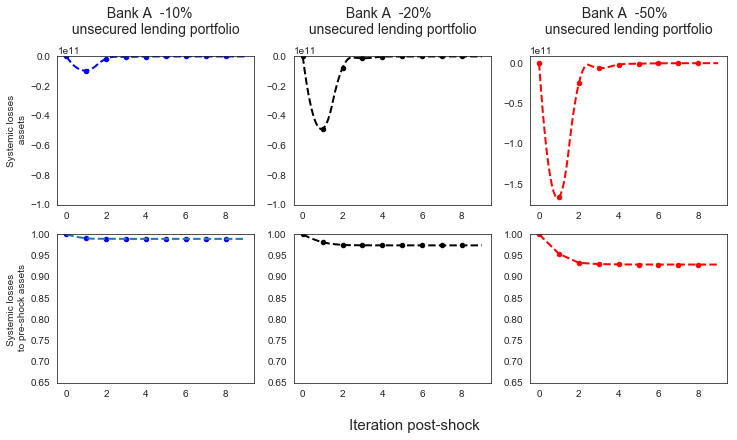

In [107]:
#run the whole thing
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline

import os
import pandas as pd
p=os.getcwd()+'/output/m_16/'
for dir, sub, files in os.walk(p):
    for f in files:
        if 'AGENT' in f and 'last' not in f:
            agents=pd.read_csv(str(dir)+'/'+f)
            
        if 'SYSTEM' in f and 'last' not in f:
            system=pd.read_csv(str(dir)+'/'+f)     
df=system 

#be careful with the bank string!

sbsa=agents.filter(like='STANDARD') 
specs=agents[agents.columns[-5:]]
stressedbank=pd.concat([sbsa,specs],axis=1)
# stressedbank.columns 
stressedbank['assets_to_pre_shock'] = stressedbank['total_assets STANDARDBANK ']/  stressedbank['total_assets STANDARDBANK '][0]

sns.set_style("white")

#Only Standard bank! 
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})

keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.5:
        I3 = np.argwhere(df['shock']==key).squeeze()

#Make x values
x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)
x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
#Make y values
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
y3 = df['system_TAS'][I3] 
#Smoothing system TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)
r2[r2 > 0.1] = 0
r3 = f3(x3new)
r3[r3 > 0.1] = 0


y4 = df['assets_to_pre_shock'][I1] 
y5 = df['assets_to_pre_shock'][I2] 
y6 = df['assets_to_pre_shock'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)

#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=2, ncols=3,   figsize=(12,6))

#ax = ax1.twinx() # THIS IS for two axesin one chart, not needed
########## 10 % shocl
axes[0][0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='B', label="-10%")
axes[0][0].set_title(" Bank A  -10%    \n unsecured lending portfolio \n", fontsize=14)
axes[0][0].set_ylim(-1e11,0)
axes[1][0].plot(x2,y4,'bo',  x2new, r4, '--', lw=2,  ms=4.5, label="-20%")
axes[1][0].set_ylabel("Systemic losses \n to pre-shock assets")
axes[1][0].set_ylim(0.65,1)


##########
########## 20 % 
axes[0][1].plot(x2,y2,'bo',  x2new,r2,'--', lw=2, color="black", ms=4.5, label="-20%")
axes[0][1].set_title(" Bank A  -20%   \n unsecured lending portfolio \n", fontsize=14)
axes[1][1].plot(x2,y5,'bo',  x2new, r5, '--', lw=2, color="black",  ms=4.5, label="-20%")
axes[1][1].set_ylim(0.65,1)
axes[0][1].set_ylim(-1e11,0)


##########  

########## 50 % 
axes[0][2].plot(x3,y3,'o',  x3new,r3,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[0][2].set_title(" Bank A  -50%   \n unsecured lending portfolio \n", fontsize=14)

axes[1][2].plot(x3,y6,'o',  x3new,r6,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[1][2].set_ylim(0.65,1)

xaxis_label = plt.xlabel('\n Iteration post-shock', fontsize=15)
xaxis_label.set_position((-0.6,3)) 

##########  

 

axes[0][0].set_ylabel("Systemic losses\n assets") #, fontsize=15
fig.savefig('./figs/banka_unsecuredlending_systemiclosses.pdf', format="pdf") #bbox_inches='tight'
 

plt.show()

In [108]:
# Make heatmap  

import os
import pandas as pd
p=os.getcwd()+'/output/m_16/'
for dir, sub, files in os.walk(p):
    for f in files:
        if 'AGENT' in f and 'last' not in f:
            agents=pd.read_csv(str(dir)+'/'+f)
            
        if 'SYSTEM' in f and 'last' not in f:
            system=pd.read_csv(str(dir)+'/'+f)     


In [167]:
df=agents.filter(like='total_asset_sales') 
step=agents.filter(like='current_step')
shock=agents.shock
heat=pd.concat([df,step,shock],axis=1)
print(heat.columns)
heat = heat.drop('current_step.1', 1)
heat = heat.drop('current_step.2', 1)
heat = heat.drop('current_step.3', 1)
heat = heat.drop('current_step.4', 1)
heat = heat.drop('current_step.5', 1)
heat = heat.drop('current_step.6', 1)
heat = heat.drop('current_step.7', 1)
heat = heat.drop('current_step.8', 1)
heat = heat.drop('current_step.9', 1)

# heat=heat[heat.columns[:-9]]

heat

Index([u'total_asset_sales FNB', u'total_asset_sales CHARTERED',
       u'total_asset_sales CAPITEC', u'total_asset_sales ABSA',
       u'total_asset_sales NEDBANK', u'total_asset_sales AfricanB',
       u'total_asset_sales CITYBANK', u'total_asset_sales INVESTEC',
       u'total_asset_sales HSBC', u'total_asset_sales STANDARDBANK ',
       u'current_step', u'current_step.1', u'current_step.2',
       u'current_step.3', u'current_step.4', u'current_step.5',
       u'current_step.6', u'current_step.7', u'current_step.8',
       u'current_step.9', u'shock'],
      dtype='object')


,total_asset_sales FNB,total_asset_sales CHARTERED,total_asset_sales CAPITEC,total_asset_sales ABSA,total_asset_sales NEDBANK,total_asset_sales AfricanB,total_asset_sales CITYBANK,total_asset_sales INVESTEC,total_asset_sales HSBC,total_asset_sales STANDARDBANK,current_step,shock
0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0,-0.5
1,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,-1.665953e+11,1,-0.5
2,0.0,0.0,0.0,0.000000e+00,0.0,0.0,-8.363007e+08,-5.800247e+08,0.0,-2.332422e+10,2,-0.5
3,0.0,0.0,0.0,-1.233450e+09,0.0,0.0,-2.221237e+08,-1.121644e+09,0.0,-3.334606e+09,3,-0.5
4,0.0,0.0,0.0,-7.982344e+08,0.0,0.0,-5.115460e+07,-2.697512e+08,0.0,-7.583142e+08,4,-0.5
5,0.0,0.0,0.0,-2.603147e+08,0.0,0.0,-1.585290e+07,-8.499947e+07,0.0,-2.412043e+08,5,-0.5
6,0.0,0.0,0.0,-8.359734e+07,0.0,0.0,-5.077744e+06,-2.725883e+07,0.0,-7.740393e+07,6,-0.5
7,0.0,0.0,0.0,-2.683027e+07,0.0,0.0,-1.629515e+06,-8.748277e+06,0.0,-2.484221e+07,7,-0.5
8,0.0,0.0,0.0,-8.610705e+06,0.0,0.0,-5.229660e+05,-2.807620e+06,0.0,-7.972705e+06,8,-0.5
9,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0,-0.2


In [168]:

# CHOOSE SHOCK
heat10=heat[heat.shock==-0.1]
heat10 = heat10.drop('shock', 1)
t=heat10.T
t['Bank']=t.index

def dfreplace(df, *args, **kwargs):
    s = pd.Series(df.values.flatten())
    s = s.str.replace(*args, **kwargs)
    return s

temp = pd.melt(heat10, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat10, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp10=temp

##########################
##########################
##########################
heat50=heat[heat.shock==-0.5]
heat50 = heat50.drop('shock', 1)
t=heat50.T
t['Bank']=t.index

temp = pd.melt(heat50, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat50, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp50=temp

In [160]:
pd.melt(heat, id_vars=[ 'current_step'], )

,current_step,variable,value
0,0,total_asset_sales FNB,0.000000e+00
1,1,total_asset_sales FNB,0.000000e+00
2,2,total_asset_sales FNB,0.000000e+00
3,3,total_asset_sales FNB,0.000000e+00
4,4,total_asset_sales FNB,0.000000e+00
5,5,total_asset_sales FNB,0.000000e+00
6,6,total_asset_sales FNB,0.000000e+00
7,7,total_asset_sales FNB,0.000000e+00
8,8,total_asset_sales FNB,0.000000e+00
9,0,total_asset_sales CHARTERED,0.000000e+00


In [158]:
temp

,iteration,old,TAS,BANK
0,0,total_asset_sales FNB,0.000000e+00,FNB
1,1,total_asset_sales FNB,0.000000e+00,FNB
2,2,total_asset_sales FNB,0.000000e+00,FNB
3,3,total_asset_sales FNB,0.000000e+00,FNB
4,4,total_asset_sales FNB,0.000000e+00,FNB
5,5,total_asset_sales FNB,0.000000e+00,FNB
6,6,total_asset_sales FNB,0.000000e+00,FNB
7,7,total_asset_sales FNB,0.000000e+00,FNB
8,8,total_asset_sales FNB,0.000000e+00,FNB
9,0,total_asset_sales CHARTERED,0.000000e+00,CHARTERED


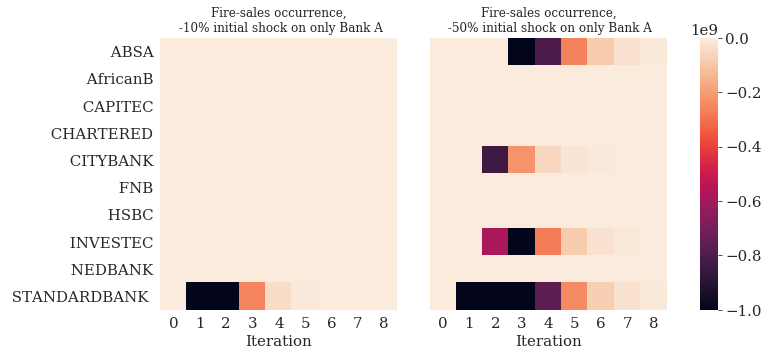

In [169]:
import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})
sns.set_style("white")

plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 16

mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
cmap1 = sns.diverging_palette(10, 220, sep=80, n=7)

tas_bonds_10 = temp10

tas_bonds_10 
result10 = tas_bonds_10.pivot(index="bank",columns="iteration", values="TAS")

tas_50 =  temp50
result50 = tas_50.pivot(index="bank",columns="iteration", values="TAS")


fig2,(ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})

ax1.get_shared_y_axes().join(ax1,ax2)

#for reverse: "YlGnBu_r"
# center=result_equity_bond_10.loc["ABSA", 4]
g3 = sns.heatmap(result10, vmin=-1e9, vmax=0,cbar=False,ax=ax1)
g3.set_ylabel('')
g3.set_xlabel('Iteration')
g3.set_title('Fire-sales occurrence,\n -10% initial shock on only Bank A')
 
g4 = sns.heatmap(result50, vmin=-1e9, vmax=0,ax=ax2, cbar_ax=axcb)
g4.set_ylabel('')
g4.set_xlabel('Iteration')
g4.set_yticks([])
g4.set_title('Fire-sales occurrence,\n -50% initial shock on only Bank A')
# fig2.savefig('fig3.png', format='png', dpi=1000)


plt.show()

# Make anonymous heat map 

[' FNB', ' CHARTERED', ' CAPITEC', ' ABSA', ' NEDBANK', ' AfricanB', ' CITYBANK', ' INVESTEC', ' HSBC', ' STANDARDBANK ']


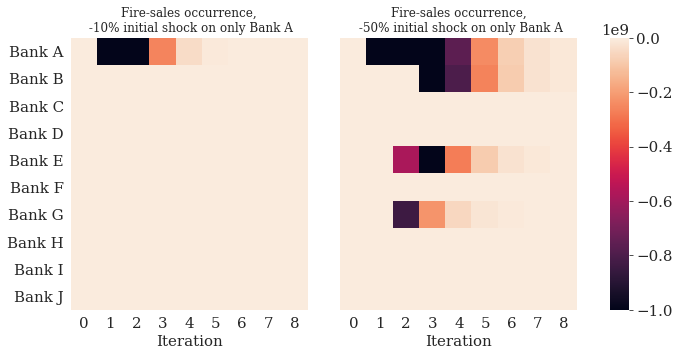

In [181]:
# 

# Make anonymous heatmap  

import os
import pandas as pd
p=os.getcwd()+'/output/m_16/'
for dir, sub, files in os.walk(p):
    for f in files:
        if 'AGENT' in f and 'last' not in f:
            agents=pd.read_csv(str(dir)+'/'+f)
            
        if 'SYSTEM' in f and 'last' not in f:
            system=pd.read_csv(str(dir)+'/'+f)   


            
df=agents.filter(like='total_asset_sales') 
step=agents.filter(like='current_step')
shock=agents.shock
heat=pd.concat([df,step,shock],axis=1)
heat = heat.drop('current_step.1', 1)
heat = heat.drop('current_step.2', 1)
heat = heat.drop('current_step.3', 1)
heat = heat.drop('current_step.4', 1)
heat = heat.drop('current_step.5', 1)
heat = heat.drop('current_step.6', 1)
heat = heat.drop('current_step.7', 1)
heat = heat.drop('current_step.8', 1)
heat = heat.drop('current_step.9', 1)


# CHOOSE SHOCK
heat10=heat[heat.shock==-0.1]
heat10 = heat10.drop('shock', 1)
t=heat10.T
t['Bank']=t.index

def dfreplace(df, *args, **kwargs):
    s = pd.Series(df.values.flatten())
    s = s.str.replace(*args, **kwargs)
    return s

temp = pd.melt(heat10, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat10, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp10=temp

##########################
##########################
##########################
heat50=heat[heat.shock==-0.5]
heat50 = heat50.drop('shock', 1)
t=heat50.T
t['Bank']=t.index

temp = pd.melt(heat50, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat50, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp50=temp
            
keys=temp10.bank.unique().tolist()

names=pd.read_csv('/Users/admin/git_repos/ba900/data/bubbles/2015_12_overview_bank_data.csv')
# names[['id','name']]
# d = {112: 'en', 113: 'es', 114: 'es', 111: 'en'}

print(keys) #IMPORTANT _ MUST BE IN RIGHT ORDER 
values=['Bank C', 'Bank I', "Bank F","Bank B","Bank D","Bank J","Bank G","Bank E","Bank H","Bank A"]
new_dict = dict(zip(keys, values))







temp50['bank'] = temp50['bank'].map(new_dict)

temp10['bank'] = temp10['bank'].map(new_dict)


import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})
sns.set_style("white")

plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 16

mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
cmap1 = sns.diverging_palette(10, 220, sep=80, n=7)

tas_bonds_10 = temp10

tas_bonds_10 
result10 = tas_bonds_10.pivot(index="bank",columns="iteration", values="TAS")

tas_50 =  temp50
result50 = tas_50.pivot(index="bank",columns="iteration", values="TAS")


fig2,(ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})

ax1.get_shared_y_axes().join(ax1,ax2)

#for reverse: "YlGnBu_r"
# center=result_equity_bond_10.loc["ABSA", 4]
g3 = sns.heatmap(result10, vmin=-1e9, vmax=0,cbar=False,ax=ax1)
g3.set_ylabel('')
g3.set_xlabel('Iteration')
g3.set_title('Fire-sales occurrence,\n -10% initial shock on only Bank A')
 
g4 = sns.heatmap(result50, vmin=-1e9, vmax=0,ax=ax2, cbar_ax=axcb)
g4.set_ylabel('')
g4.set_xlabel('Iteration')
g4.set_yticks([])
g4.set_title('Fire-sales occurrence,\n -50% initial shock on only Bank A')

fig2.savefig('./figs/heatmap_banka_unsecured.png', format="png") #bbox_inches='tight'


plt.show()


[-0.5 -0.2 -0.1]


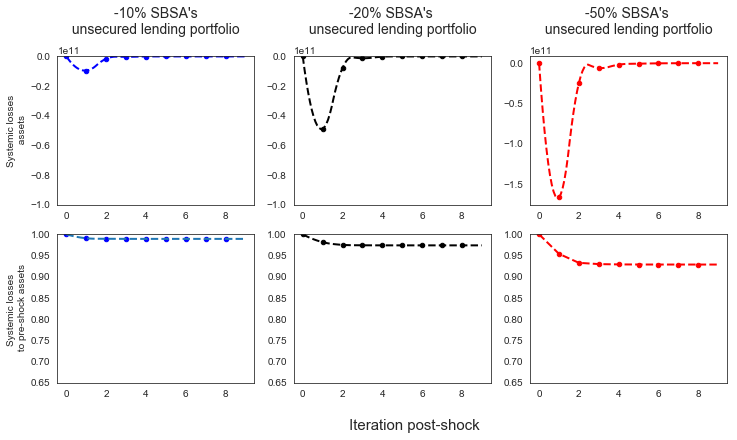

In [96]:
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline

sns.set_style("white")

#Only Standard bank! 
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})

keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.5:
        I3 = np.argwhere(df['shock']==key).squeeze()

#Make x values
x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)
x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
#Make y values
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
y3 = df['system_TAS'][I3] 
#Smoothing system TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)
r2[r2 > 0.1] = 0
r3 = f3(x3new)
r3[r3 > 0.1] = 0


y4 = df['assets_to_pre_shock'][I1] 
y5 = df['assets_to_pre_shock'][I2] 
y6 = df['assets_to_pre_shock'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)

#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=2, ncols=3,   figsize=(12,6))

#ax = ax1.twinx() # THIS IS for two axesin one chart, not needed
########## 10 % shocl
axes[0][0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='B', label="-10%")
axes[0][0].set_title(" -10% SBSA's \n unsecured lending portfolio \n", fontsize=14)
axes[0][0].set_ylim(-1e11,0)
axes[1][0].plot(x2,y4,'bo',  x2new, r4, '--', lw=2,  ms=4.5, label="-20%")
axes[1][0].set_ylabel("Systemic losses \n to pre-shock assets")
axes[1][0].set_ylim(0.65,1)


##########
########## 20 % 
axes[0][1].plot(x2,y2,'bo',  x2new,r2,'--', lw=2, color="black", ms=4.5, label="-20%")
axes[0][1].set_title(" -20% SBSA's  \n unsecured lending portfolio \n", fontsize=14)
axes[1][1].plot(x2,y5,'bo',  x2new, r5, '--', lw=2, color="black",  ms=4.5, label="-20%")
axes[1][1].set_ylim(0.65,1)
axes[0][1].set_ylim(-1e11,0)


##########  

########## 50 % 
axes[0][2].plot(x3,y3,'o',  x3new,r3,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[0][2].set_title(" -50% SBSA's  \n unsecured lending portfolio \n", fontsize=14)

axes[1][2].plot(x3,y6,'o',  x3new,r6,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[1][2].set_ylim(0.65,1)

xaxis_label = plt.xlabel('\n Iteration post-shock', fontsize=15)
xaxis_label.set_position((-0.6,3)) 

##########  

 

axes[0][0].set_ylabel("Systemic losses\n assets") #, fontsize=15
#fig.savefig('sbsa.pdf', format="pdf") #bbox_inches='tight'
 

plt.show()


In [45]:
temp=[]
helper={}
helper['asset class'] = str(sys.argv[2])
helper['shock'] =  str(sys.argv[1]) 
helper['time'] = '2015-12'
helper['valuation_losses']=t['system_TAS'][2:].sum()/t['system_assets'][0] *-1 *100
temp.append(pd.DataFrame(helper, index= ['2015-12']))
pd.DataFrame(helper, index= ['2015-12']).to_csv('t.csv')